In [1]:
import os
from Utils.visualization import *

# Words

Precision:0.6165, Recall:0.5529, F1-score:0.5830, Accuraci:0.6045, AUC:0.6542
Precision:0.7096, Recall:0.5688, F1-score:0.6314, Accuraci:0.6680, AUC:0.7135


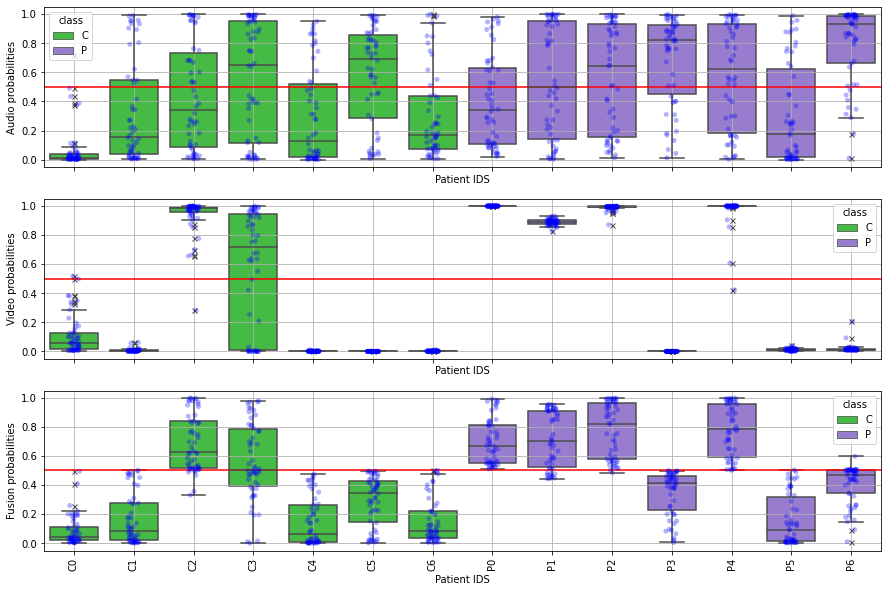

In [2]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv'
save_name  = 'Patients words'

view_results(audio_path)
view_results(video_path)

generate_final_visualization(audio_path,
                             video_path,
                             save_name,
                             'Patient IDS')

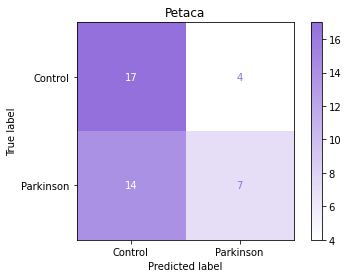

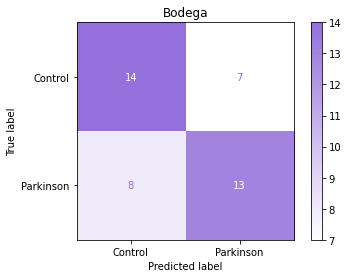

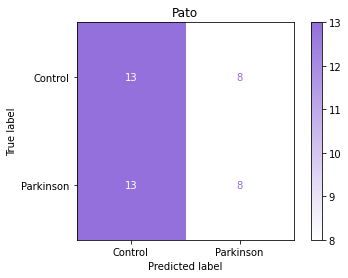

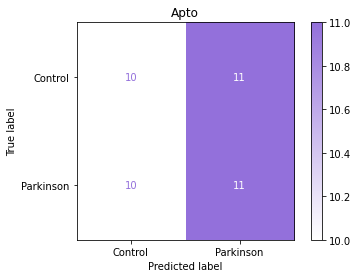

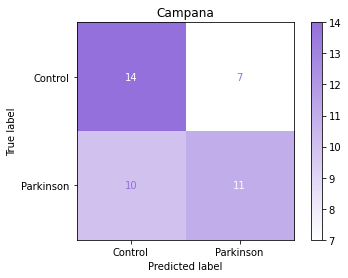

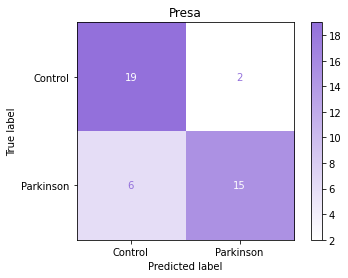

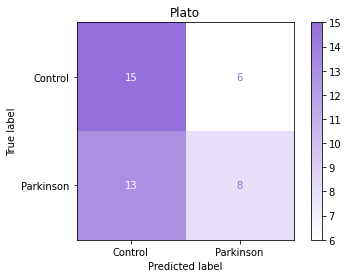

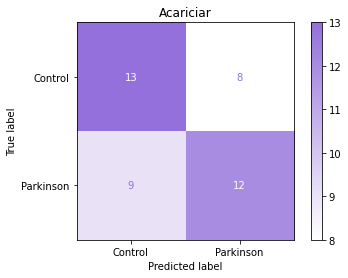

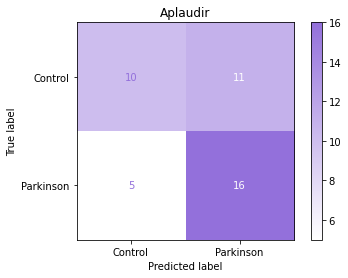

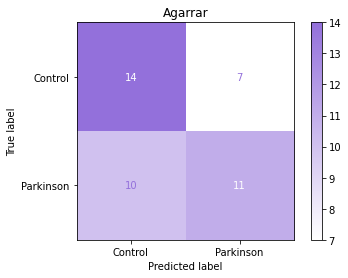

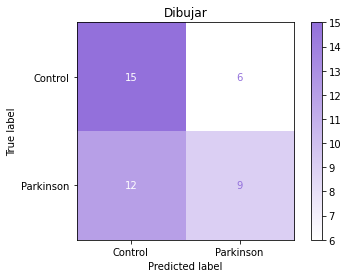

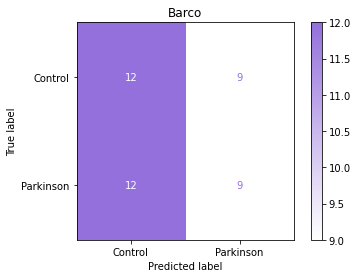

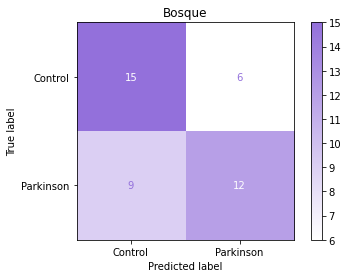

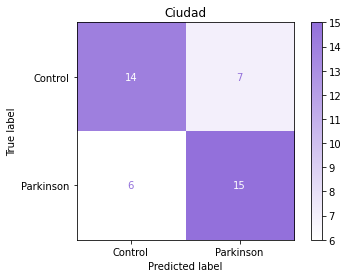

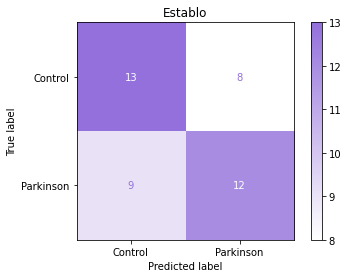

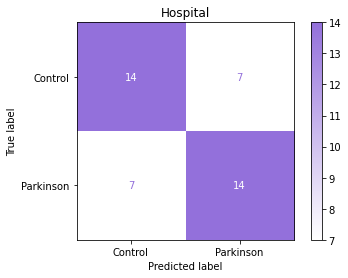

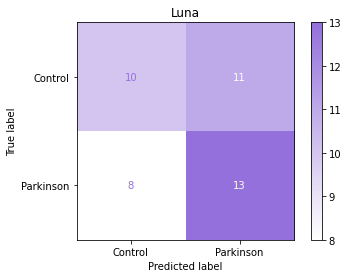

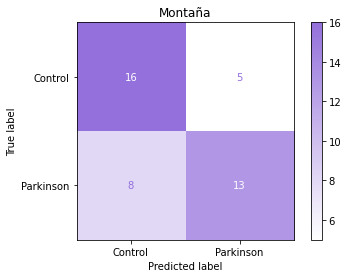

In [2]:
Exercises = ['Petaca', 'Bodega', 'Pato', 'Apto', 'Campana', 'Presa', 'Plato', 'Acariciar', 'Aplaudir', 'Agarrar', 'Dibujar', 'Barco', 'Bosque', 'Ciudad', 'Establo', 'Hospital', 'Luna', 'Montaña']

for exercise in Exercises:
    generate_confusion_matix('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv',
                             exercise,
                             'Audio')

# Phonemes

Precision:0.6731, Recall:0.5556, F1-score:0.6087, Accuraci:0.6429, AUC:0.6644
Precision:0.7391, Recall:0.5397, F1-score:0.6239, Accuraci:0.6746, AUC:0.7506


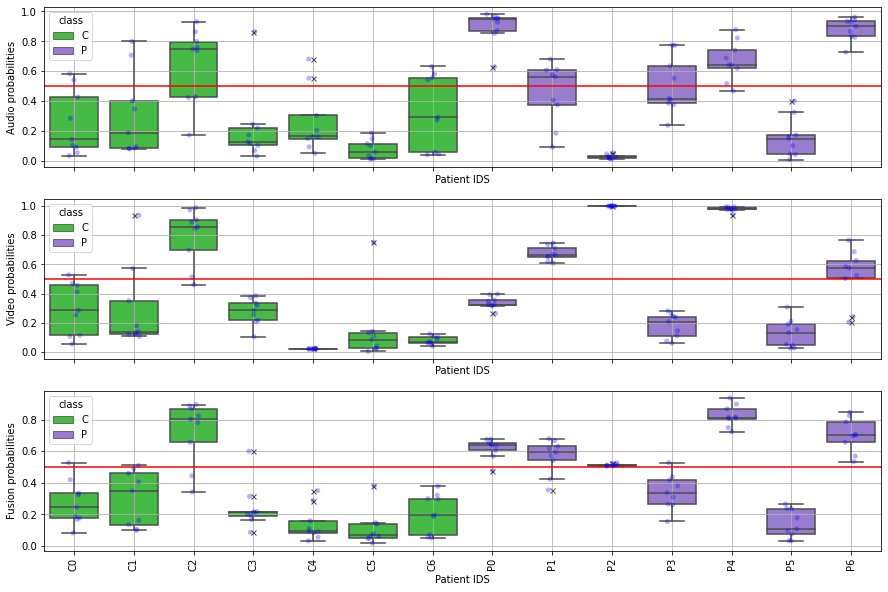

In [15]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
save_name  = 'Patients phonemes'

view_results(audio_path)
view_results(video_path)

generate_final_visualization(audio_path,
                             video_path,
                             save_name,
                             'Patient IDS')

# Vowels

Precision:0.8750, Recall:0.4000, F1-score:0.5490, Accuraci:0.6667, AUC:0.7156
Precision:0.4964, Recall:0.6571, F1-score:0.5656, Accuraci:0.4879, AUC:0.4500


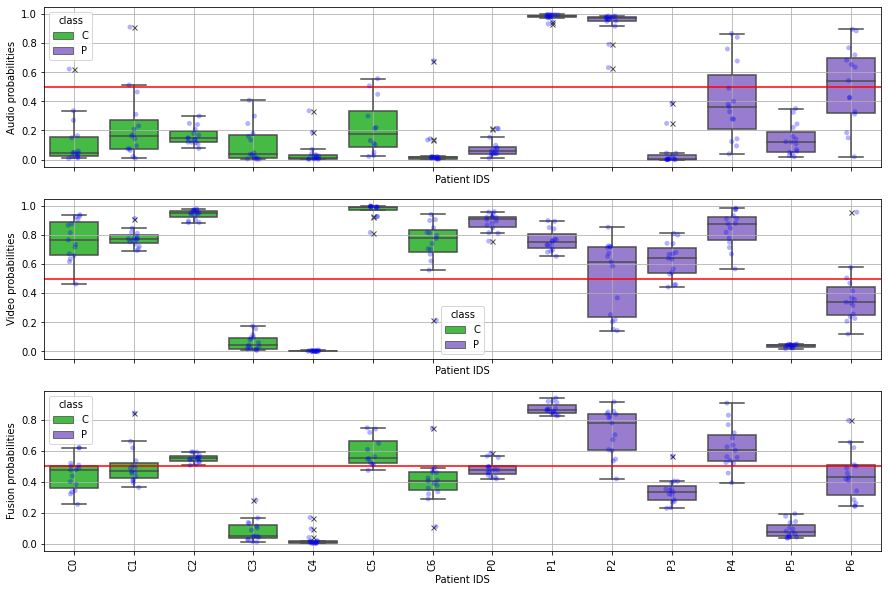

In [16]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:7e-05-Epoch:7-Exercise:Vowels-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv'
save_name  = 'Patients vowels'

view_results(audio_path)
view_results(video_path)

generate_final_visualization(audio_path,
                             video_path,
                             save_name,
                             'Patient IDS')

In [17]:
import pandas  as pd
import seaborn as sns
import numpy   as np

import matplotlib.pyplot as plt

video = pd.read_csv('Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv')
video = video[video['Sample_ids'] == 'C1']
audio = pd.read_csv('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv')
audio = audio[audio['Sample_ids'] == 'C1']

video = video['PK_props'].values.reshape(9,1)
audio = audio['PK_props'].values.reshape(9,1)
fusion =list(np.mean((video, audio), axis=0)[:,0])

video = list(video[:,0])
audio = list(audio[:,0])

video_l, audio_l, fusion_l = [], [], []
for i in range(9):
    video_l.append('Video')
    audio_l.append('Audio')
    fusion_l.append('Fusion')

data = pd.DataFrame({'Probability': audio + video + fusion,
                    'Modality': audio_l + video_l + fusion_l})

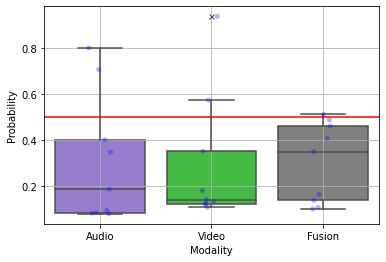

In [18]:
sns.stripplot(x = 'Modality', y = 'Probability', data=data, marker="o", alpha=0.3, color="blue")
g = sns.boxplot(x = 'Modality', y = 'Probability', data=data, palette=["mediumpurple", 'limegreen', 'grey'], dodge=False, flierprops={"marker": "x"})
g.axhline(0.5, color='r')
g.grid(0.2)
plt.savefig('Images/{}.pdf'.format('Fusion exmaple'))